# Import Library

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import graphviz
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import warnings

warnings.filterwarnings('ignore')

# Load Dataset

In [236]:
data = pd.read_csv('bank.csv', delimiter=';')

In [237]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# Prepocessing

column default, housing, loan, y must be an binary

In [239]:
label_encoder = LabelEncoder()

column_binary = ['default', 'housing', 'loan', 'y']
for col in column_binary:
    data[col] = label_encoder.fit_transform(data[col])

In [240]:
data.housing

0       0
1       1
2       1
3       1
4       1
       ..
4516    1
4517    1
4518    0
4519    0
4520    1
Name: housing, Length: 4521, dtype: int32

object must be an category

In [241]:
col_object = data.select_dtypes(include='object').columns
for col in col_object:
    data[col] = data[col].astype('category')

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   int64   
 1   job        4521 non-null   category
 2   marital    4521 non-null   category
 3   education  4521 non-null   category
 4   default    4521 non-null   int32   
 5   balance    4521 non-null   int64   
 6   housing    4521 non-null   int32   
 7   loan       4521 non-null   int32   
 8   contact    4521 non-null   category
 9   day        4521 non-null   int64   
 10  month      4521 non-null   category
 11  duration   4521 non-null   int64   
 12  campaign   4521 non-null   int64   
 13  pdays      4521 non-null   int64   
 14  previous   4521 non-null   int64   
 15  poutcome   4521 non-null   category
 16  y          4521 non-null   int32   
dtypes: category(6), int32(4), int64(7)
memory usage: 345.9 KB


# Logistic Regression

In [243]:
X = data['age'].values.reshape(-1, 1)
y = data['housing']

In [244]:
X.shape

(4521, 1)

In [245]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [246]:
model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

In [247]:
y_pred = model.predict(x_test)

print(f"Accuracy Score = ", accuracy_score(y_test, y_pred))
print(f"Confussion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6088397790055249
Confussion Matrix
[[134 282]
 [ 72 417]]


Visualization model

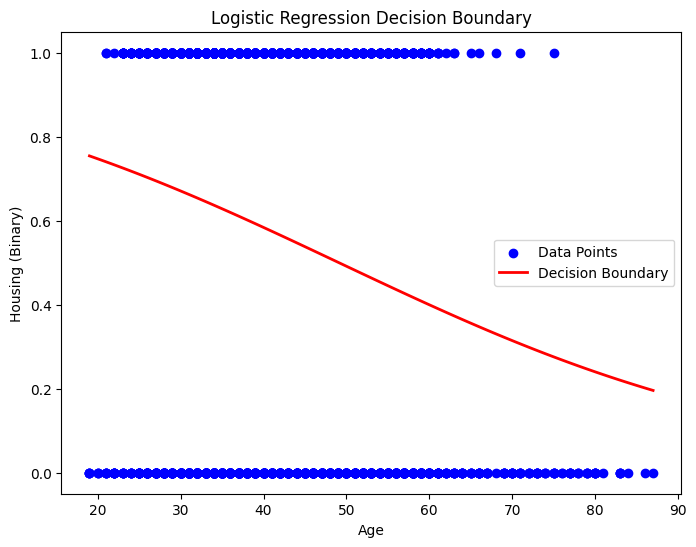

In [248]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', marker='o', label='Data Points')

# Menghasilkan titik-titik pada sumbu x untuk membuat garis keputusan
x_values = np.linspace(min(X), max(X), 100).reshape(-1, 1)
# Menghitung nilai y menggunakan model regresi logistik
y_values = model.predict_proba(x_values)[:, 1]

# Menambahkan garis keputusan ke plot
plt.plot(x_values, y_values, color='red', linewidth=2, label='Decision Boundary')

# Menambahkan label dan legenda
plt.xlabel('Age')
plt.ylabel('Housing (Binary)')
plt.legend()
plt.title('Logistic Regression Decision Boundary')
plt.show()

# K-Nearest Neighbors

In [249]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [250]:
pred = knn.predict(x_test)

accuracy =  accuracy_score(y_test, pred)
print(f"Accuracy Score = ", accuracy_score(y_test, y_pred))
print(f"Confussion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6088397790055249
Confussion Matrix
[[134 282]
 [ 72 417]]


# Support Vector Machine

In [251]:
X = data[['age', 'housing', 'loan']]
y = data['y']

In [252]:
svm_model = SVC(kernel='linear', random_state=42)

In [253]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [254]:
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [255]:
y_pred = svm_model.predict(x_test)

In [256]:
print(f"Accuracy Score = ", accuracy_score(y_test, y_pred))
print(f"Confussion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.8917127071823204
Confussion Matrix
[[807   0]
 [ 98   0]]


# Decission Tree

In [257]:
model = DecisionTreeClassifier(criterion='entropy')

clf = model.fit(x_train, y_train)
clf

DecisionTreeClassifier(criterion='entropy')

In [258]:
y_pred = clf.predict(x_test)

In [259]:
print(f"Accuracy Score = ", accuracy_score(y_test, y_pred))
print(f"Confussion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.8883977900552487
Confussion Matrix
[[804   3]
 [ 98   0]]


Visualizing Decision Tree

In [260]:
feature = ['age', 'housing', 'loan']

dot_data = tree.export_graphviz(
    clf, 
    out_file=None, 
    class_names=['0','1'],
    feature_names=feature,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)  
graph.view("decision_tree")

'decision_tree.pdf'

# Random Forest

In [261]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier()

In [262]:
y_pred = model.predict(x_test)

In [263]:
print(f"Accuracy Score = ", accuracy_score(y_test, y_pred))
print(f"Confussion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.8861878453038674
Confussion Matrix
[[802   5]
 [ 98   0]]


# Naive Bayes

In [264]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [265]:
y_pred = model.predict(x_test)

In [266]:
print(f"Accuracy Score = ", accuracy_score(y_test, y_pred))
print(f"Confussion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.8895027624309392
Confussion Matrix
[[801   6]
 [ 94   4]]


# Data Anylisis Visualization

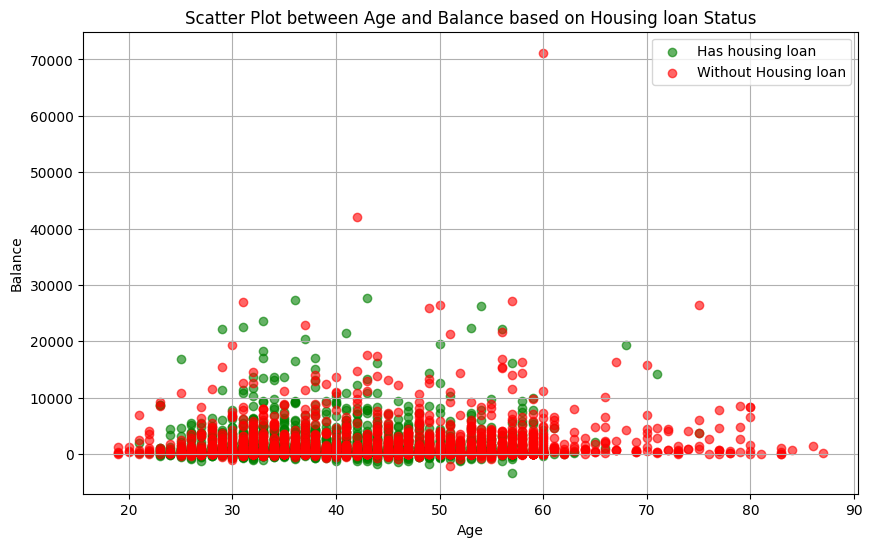

In [271]:
with_housing_loan = data[data['housing'] == 1]
without_housing_loan = data[data['housing'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(with_housing_loan['age'], with_housing_loan['balance'], color='green', label='Has housing loan', alpha=0.6)

plt.scatter(without_housing_loan['age'], without_housing_loan['balance'], color='red', label='Without Housing loan', alpha=0.6)

plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Scatter Plot between Age and Balance based on Housing loan Status')
plt.legend()
plt.grid(True)
plt.show()


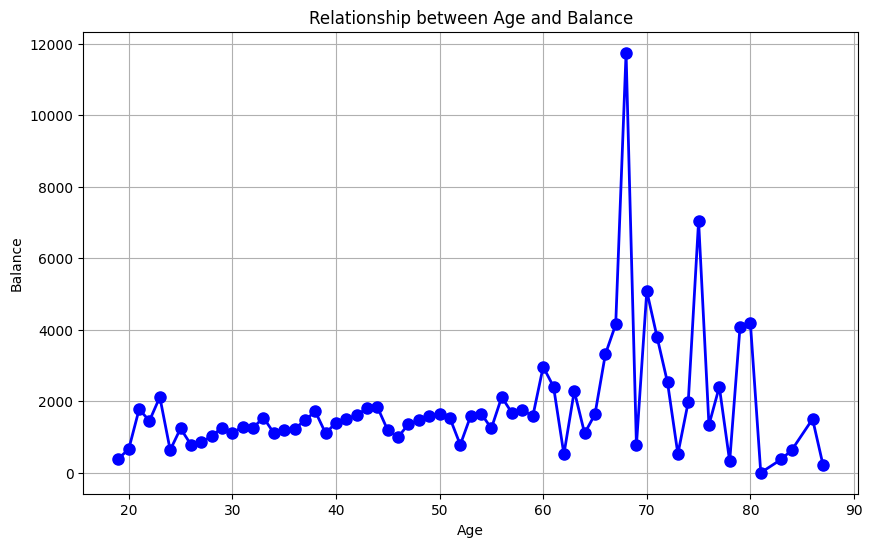

In [274]:
avg_balance = data.groupby('age')['balance'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_balance.index, avg_balance.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Relationship between Age and Balance')
plt.grid(True)
plt.show()
